In [3]:
import sys
assert sys.version_info >= (3,5)
import sklearn
import numpy as np
import os
np.random.seed(42)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize = 12)
mpl.rc('ytick',labelsize= 12)


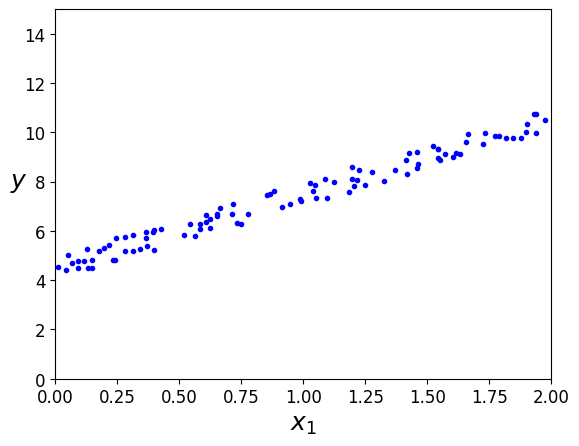

In [5]:
#normal equation
import numpy as np
X = 2*np.random.rand(100,1)
y = 4+3*X+ np.random.rand(100,1)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
#we are just generate a liner model y = 4+3x + gaussian noise
plt.show()

In [6]:
#compute theta hat
X_b = np.c_[np.ones((100,1)),X] #add x0=1 to each instantce
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.51359766],
       [2.98323418]])

In [ ]:
4.51 compare to 4, 2.98 compare to the 3, good enough but because of the gaussian noise 
its unable to recover the exact params

In [9]:
#make predictions using theta hat 
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict
#Xb is for compact with the theta 0

array([[ 4.51359766],
       [10.48006601]])

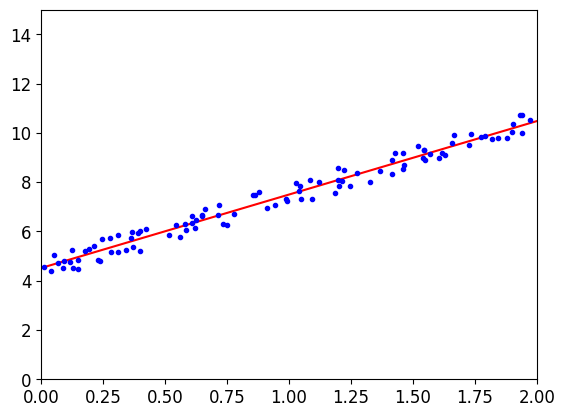

In [10]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.51359766]), array([[2.98323418]]))

In [12]:
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])

In [13]:
theta_best_svd,residuals,rank,s= np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[4.51359766],
       [2.98323418]])

In [14]:
np.linalg.pinv(X_b).dot(y)
#theta hat = X+ y, where X+ is the pseudoinverse of X

array([[4.51359766],
       [2.98323418]])

In [16]:
eta=0.1 #learning rate
n_iterations =1000
m=100 #number of training example
theta = np.random.randn(2,1) #random initialization

for itertaion in range (n_iterations):
    gradients = 2/m *X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients
theta


array([[4.51359766],
       [2.98323418]])